# Given data + code examples

In [1]:
# imports
import pandas as pd

In [2]:
# read in the dataframe

# not necessary anymore because csv changed: affected columns contain integers now instead of objects (strings):
# [added argument "thousands=','" so that pandas can convert strings into float values correctly]
url = 'https://raw.githubusercontent.com/joa24jm/21-12-13_air-qual/master/data/01_raw/AirQualityUCI.csv'
df = pd.read_csv(url, sep=';', decimal=',')

In [3]:
# describe the dataframe
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,0.0,0.0
mean,-39.626619,1051.390473,-152.138785,2.853501,911.895974,149.096524,810.866592,45.156164,1445.659290,979.964741,11.545486,39.972981,-6.183809,NaN,NaN
std,81.903331,324.558998,150.096708,39.977717,340.000627,260.628377,321.385807,129.330765,455.347712,449.200147,41.835465,49.468677,37.531010,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.500000,917.000000,-200.000000,4.300000,727.000000,39.000000,652.000000,44.000000,1275.250000,710.000000,12.300000,33.800000,0.779300,NaN,NaN
50%,1.500000,1051.500000,-200.000000,8.300000,911.000000,122.000000,807.000000,90.000000,1494.000000,942.000000,18.700000,48.500000,1.031600,NaN,NaN
75%,2.600000,1225.000000,-200.000000,14.200000,1122.000000,259.750000,976.000000,125.000000,1698.000000,1253.750000,25.100000,61.600000,1.358525,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


# Start of code added for training purposes

In [4]:
# drop columns without Values
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

In [5]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,06/02/2005,19.00.00,1.6,985,-200,4.5,736,227,891,165,875,774,6.0,38.0,0.3584
7994,06/02/2005,20.00.00,1.8,1002,-200,5.3,780,252,855,179,892,857,5.8,36.4,0.3385
7995,06/02/2005,21.00.00,1.4,938,-200,3.7,692,193,937,149,805,737,5.8,35.4,0.3286
7996,06/02/2005,22.00.00,1.1,896,-200,2.6,627,158,1033,126,782,610,5.4,36.6,0.3304


In [6]:
# checking datatypes of all columns
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [7]:
# 'Date'-column changed to contain date and time combined
df['Date'] = df['Date'] + ' ' + df['Time']

In [8]:
# parsing 'Date' into datetime-format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H.%M.%S')
# dropping old column 'Time'
df.drop(columns='Time', inplace=True)

In [9]:
df

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985,-200,4.5,736,227,891,165,875,774,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002,-200,5.3,780,252,855,179,892,857,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938,-200,3.7,692,193,937,149,805,737,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896,-200,2.6,627,158,1033,126,782,610,5.4,36.6,0.3304


In [10]:
# this isn't necessary anymore because following columns datatypes changed to integers (from objects before):

# convert given columns into datatype float
# additional argument was needed in read_csv() function for pandas to recognize commas in strings correctly (cell 3)

# df['CO(GT)'] = df['CO(GT)'].astype(float)
# df['C6H6(GT)'] = df['C6H6(GT)'].astype(float)
# df['T'] = df['T'].astype(float)
# df['RH'] = df['RH'].astype(float)
# df['AH'] = df['AH'].astype(float)

### Grouping and aggregation

In [11]:
date_group = df.groupby('Date')

In [12]:
date_group


# Plotting data to evaluate their plausibility 
______________

In [13]:
# imports
import matplotlib.pyplot as plt

# configuration of how plots are displayed (width, height)
plt.rcParams['figure.figsize'] = [15, 8]

df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,-39.626619,1051.390473,-152.138785,2.853501,911.895974,149.096524,810.866592,45.156164,1445.659290,979.964741,11.545486,39.972981,-6.183809
std,81.903331,324.558998,150.096708,39.977717,340.000627,260.628377,321.385807,129.330765,455.347712,449.200147,41.835465,49.468677,37.531010
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.500000,917.000000,-200.000000,4.300000,727.000000,39.000000,652.000000,44.000000,1275.250000,710.000000,12.300000,33.800000,0.779300
50%,1.500000,1051.500000,-200.000000,8.300000,911.000000,122.000000,807.000000,90.000000,1494.000000,942.000000,18.700000,48.500000,1.031600
75%,2.600000,1225.000000,-200.000000,14.200000,1122.000000,259.750000,976.000000,125.000000,1698.000000,1253.750000,25.100000,61.600000,1.358525
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## CO(GT):

<function matplotlib.pyplot.show(close=None, block=None)>

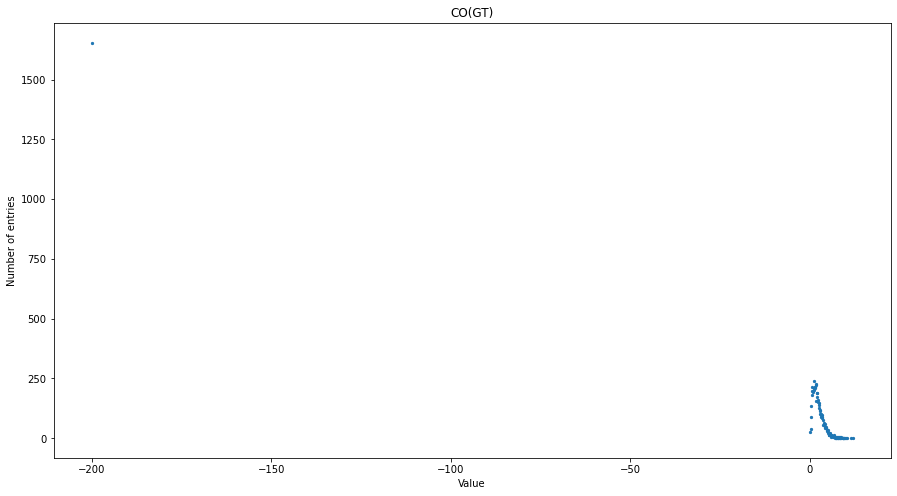

In [14]:
x_lst = df['CO(GT)'].value_counts()

plt.title('CO(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [15]:
df['CO(GT)'].value_counts()

-200.0    1654
 1.0       240
 1.6       227
 1.7       221
 1.4       215
          ... 
 11.9        1
 9.5         1
 7.6         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 96, dtype: int64

In [16]:
# filter column so that values below -5 aren't included
filt = df['CO(GT)'].between(-5, 30)
filt_df = df['CO(GT)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

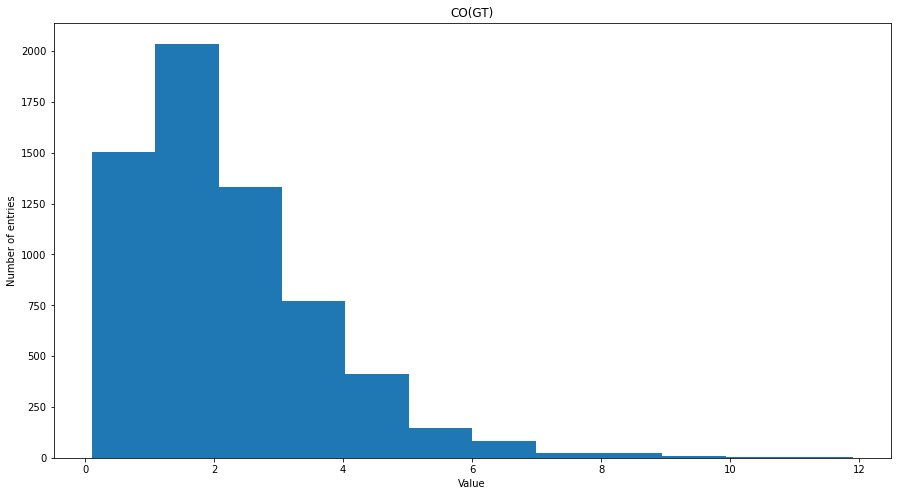

In [17]:
plt.title('CO(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins= 12)
plt.show

Value -200 seems to be an unwanted outlier

## PT08.S1(CO)

<function matplotlib.pyplot.show(close=None, block=None)>

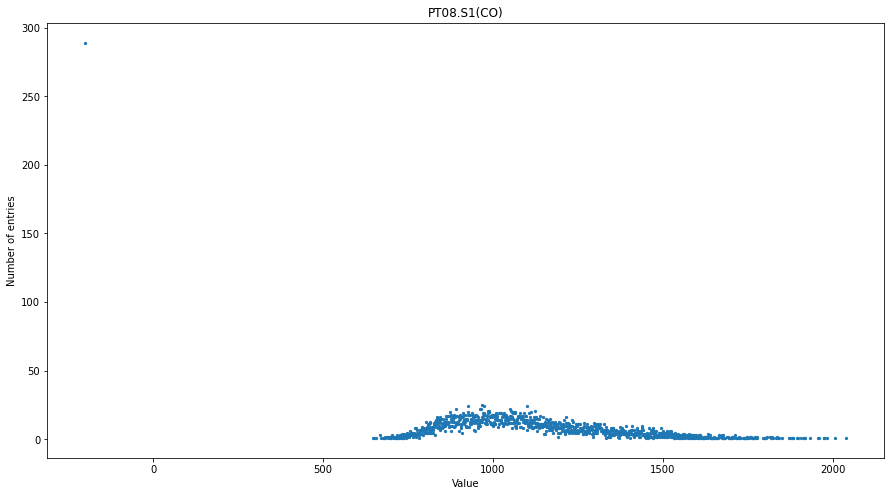

In [18]:
x_lst = df['PT08.S1(CO)'].value_counts()

plt.title('PT08.S1(CO)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [19]:
df['PT08.S1(CO)'].value_counts()

-200     289
 969      25
 973      24
 1100     24
 925      24
        ... 
 1776      1
 717       1
 731       1
 782       1
 1655      1
Name: PT08.S1(CO), Length: 1028, dtype: int64

In [20]:
# filter column so that values below 500 aren't included
filt = df['PT08.S1(CO)'].between(500, 2500)
filt_df = df['PT08.S1(CO)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

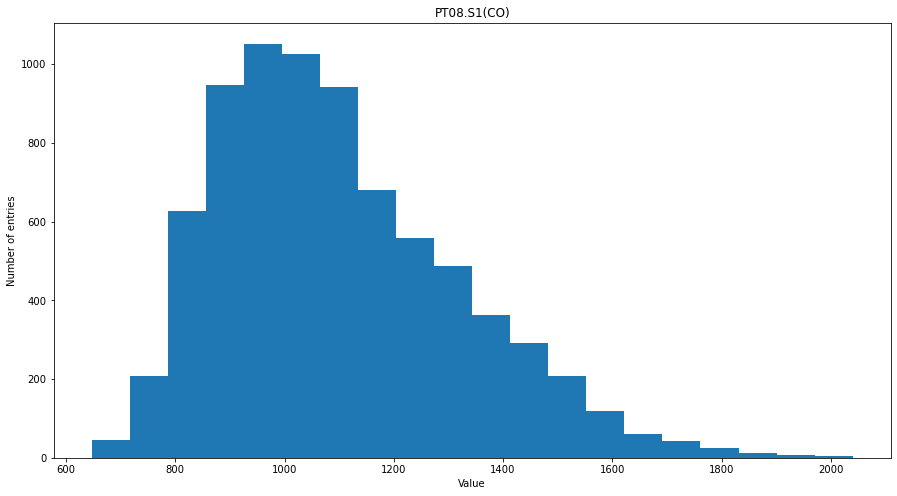

In [21]:
# histogram based on filtered column
plt.title('PT08.S1(CO)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## NMHC(GT)

<function matplotlib.pyplot.show(close=None, block=None)>

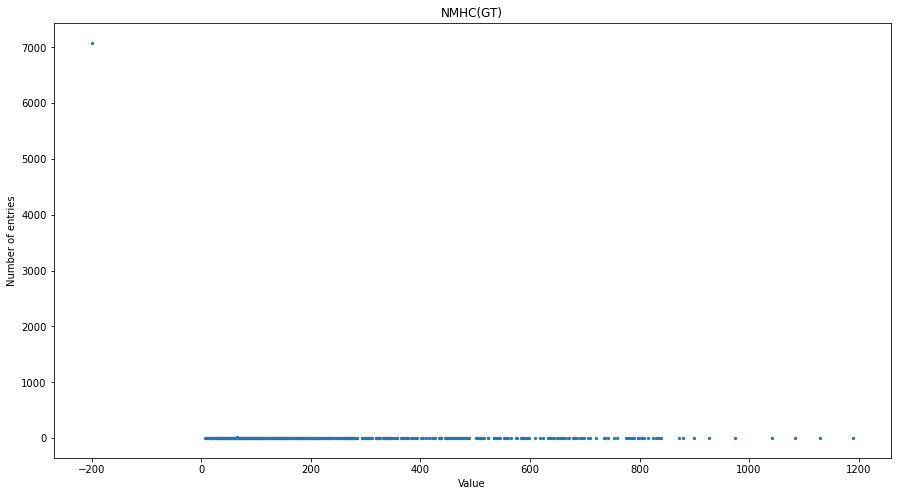

In [22]:
x_lst = df['NMHC(GT)'].value_counts()

plt.title('NMHC(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [23]:
df['NMHC(GT)'].value_counts()

-200    7084
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64

In [24]:
# filter column so that values below 0 aren't included
filt = df['NMHC(GT)'].between(0, 1500)
filt_df = df['NMHC(GT)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

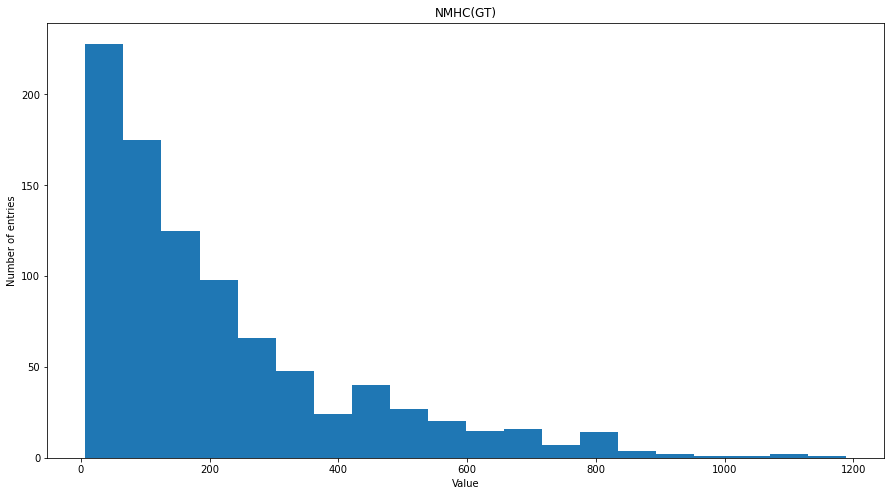

In [25]:
# histogram based on filtered column
plt.title('NMHC(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## C6H6(GT)

<function matplotlib.pyplot.show(close=None, block=None)>

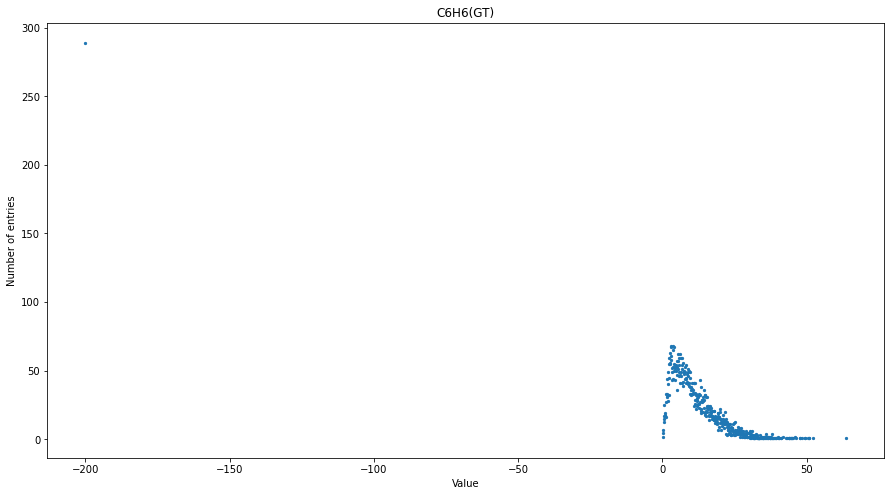

In [26]:
x_lst = df['C6H6(GT)'].value_counts()

plt.title('C6H6(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [27]:
df['C6H6(GT)'].nlargest(10)

6160    63.7
5520    52.1
6672    50.8
6159    50.7
6193    50.6
6192    49.5
6194    49.4
5690    48.2
6048    47.7
5736    47.5
Name: C6H6(GT), dtype: float64

In [28]:
# filter column so that values below 0 aren't included
filt = df['C6H6(GT)'].between(-10, 100)
filt_df = df['C6H6(GT)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

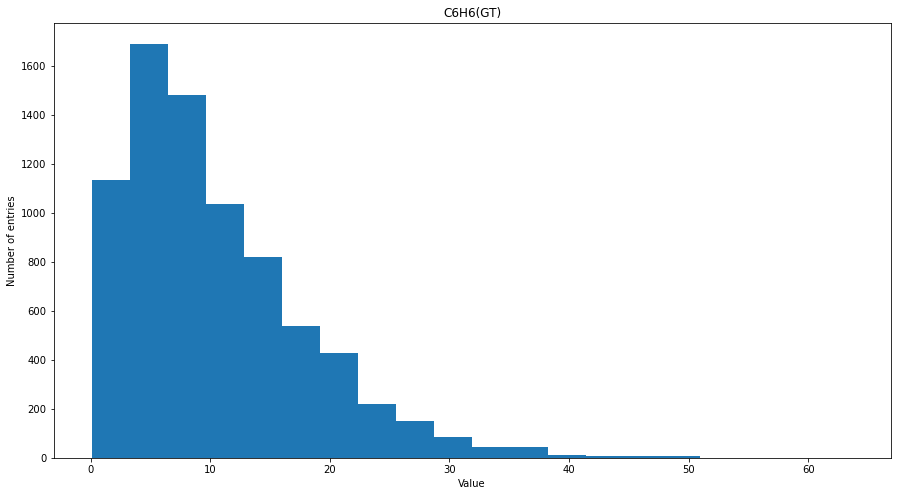

In [29]:
# histogram based on filtered column
plt.title('C6H6(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## PT08.S2(NMHC) 	

<function matplotlib.pyplot.show(close=None, block=None)>

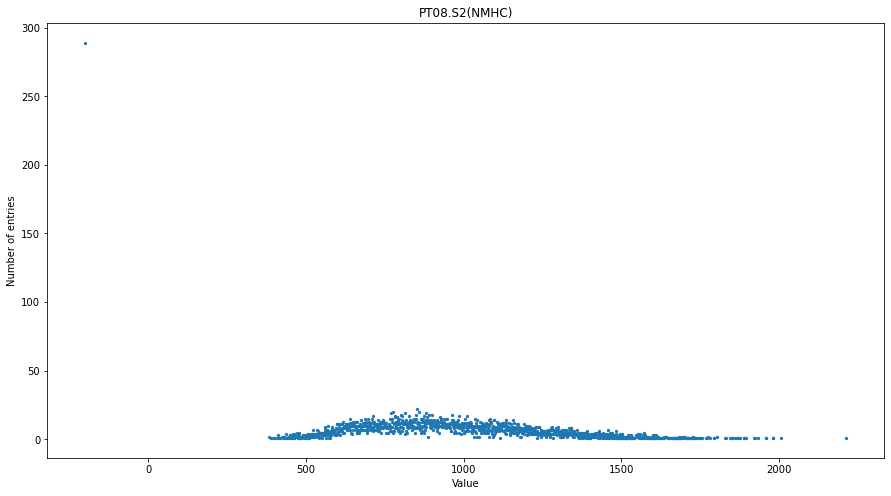

In [30]:
x_lst = df['PT08.S2(NMHC)'].value_counts()

plt.title('PT08.S2(NMHC)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [31]:
df['PT08.S2(NMHC)'].value_counts()

-200     289
 853      22
 776      20
 859      20
 814      19
        ... 
 1536      1
 1866      1
 1569      1
 1782      1
 1284      1
Name: PT08.S2(NMHC), Length: 1222, dtype: int64

In [32]:
# filter column so that values below 200 aren't included
filt = df['PT08.S2(NMHC)'].between(200, 3000)
filt_df = df['PT08.S2(NMHC)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

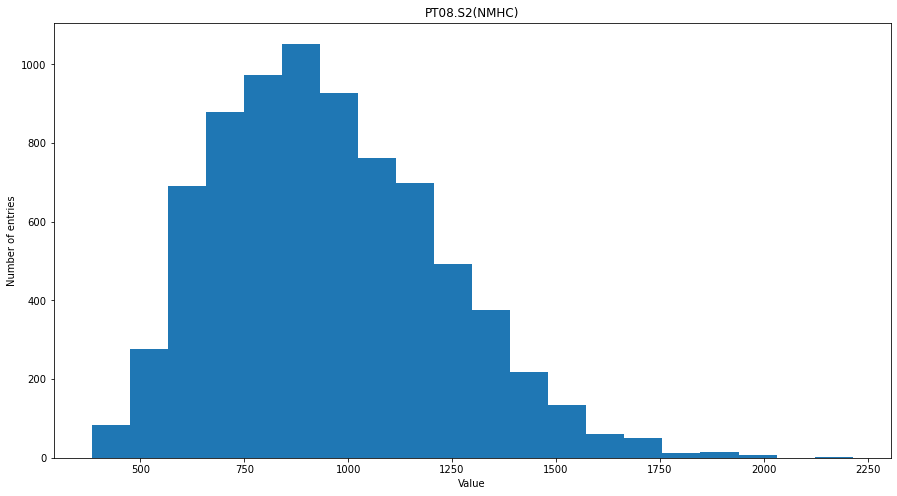

In [33]:
# histogram based on filtered column
plt.title('PT08.S2(NMHC)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## NOx(GT) 	

<function matplotlib.pyplot.show(close=None, block=None)>

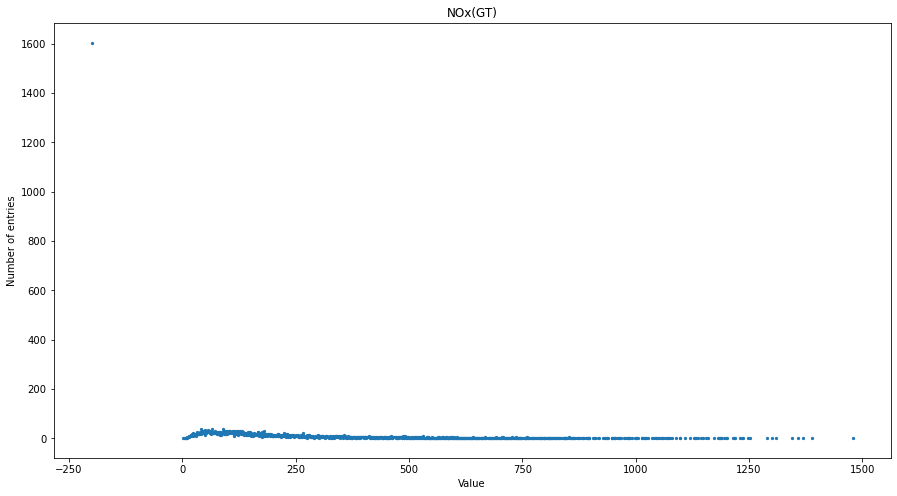

In [34]:
x_lst = df['NOx(GT)'].value_counts()

plt.title('NOx(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [35]:
df['NOx(GT)'].value_counts()

-200     1604
 89        39
 65        37
 41        36
 57        32
         ... 
 856        1
 949        1
 932        1
 1134       1
 708        1
Name: NOx(GT), Length: 891, dtype: int64

In [36]:
# filter column so that values below -50 aren't included
filt = df['NOx(GT)'].between(-50, 3000)
filt_df = df['NOx(GT)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

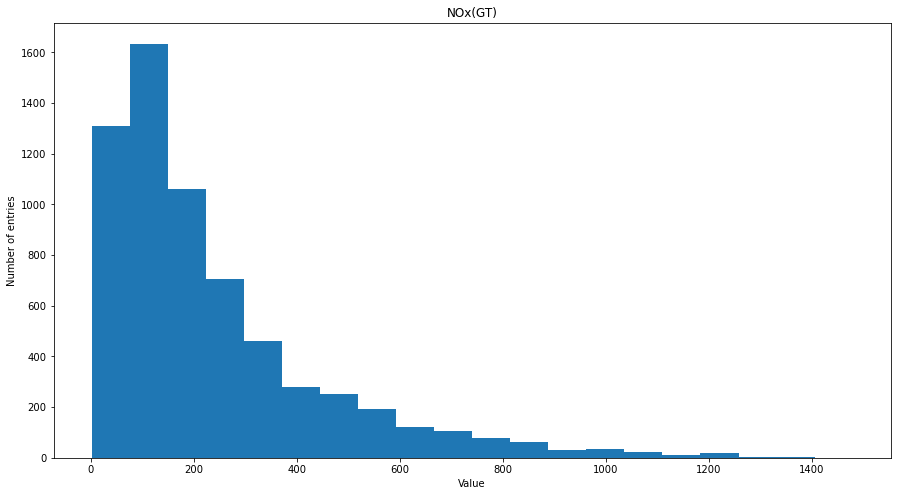

In [37]:
# histogram based on filtered column
plt.title('NOx(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## PT08.S3(NOx) 	 	

<function matplotlib.pyplot.show(close=None, block=None)>

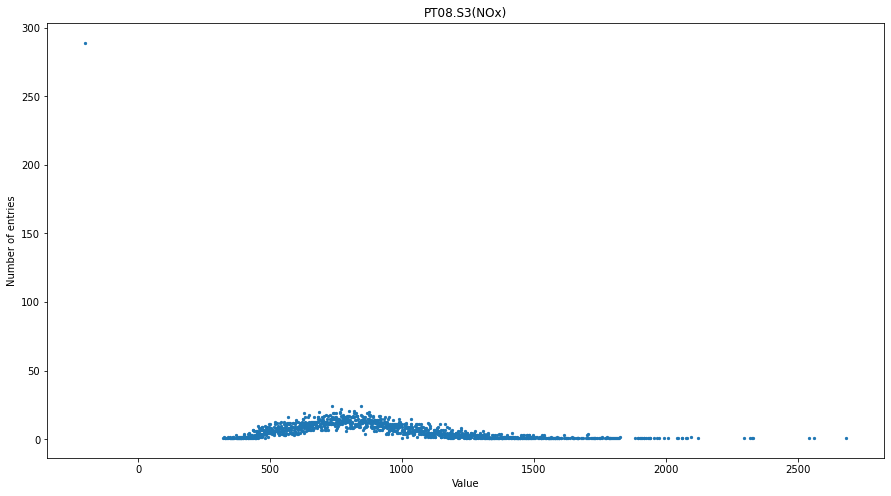

In [38]:
x_lst = df['PT08.S3(NOx)'].value_counts()

plt.title('PT08.S3(NOx)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [39]:
df['PT08.S3(NOx)'].value_counts()

-200     289
 733      24
 846      24
 767      22
 816      21
        ... 
 1406      1
 1488      1
 441       1
 1279      1
 1363      1
Name: PT08.S3(NOx), Length: 1204, dtype: int64

In [40]:
# filter column so that values below 200 aren't included
filt = df['PT08.S3(NOx)'].between(200, 3000)
filt_df = df['PT08.S3(NOx)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

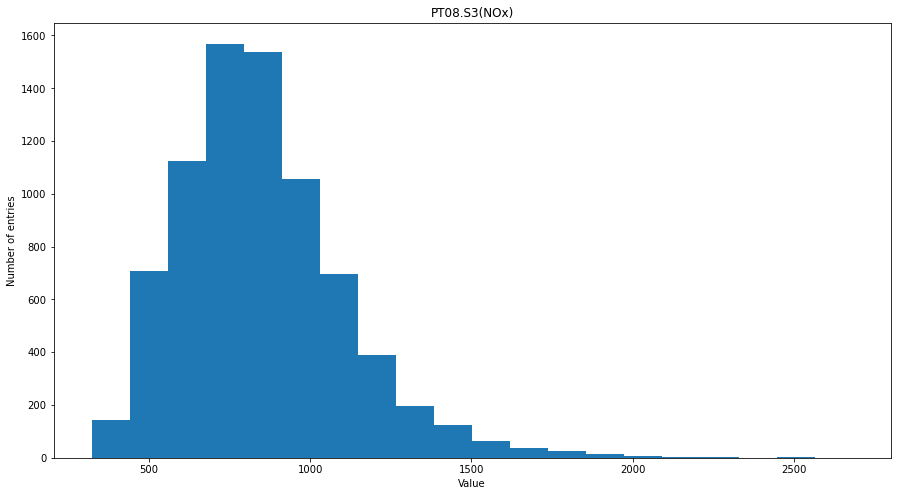

In [41]:
# histogram based on filtered column
plt.title('PT08.S3(NOx)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## NO2(GT)	

<function matplotlib.pyplot.show(close=None, block=None)>

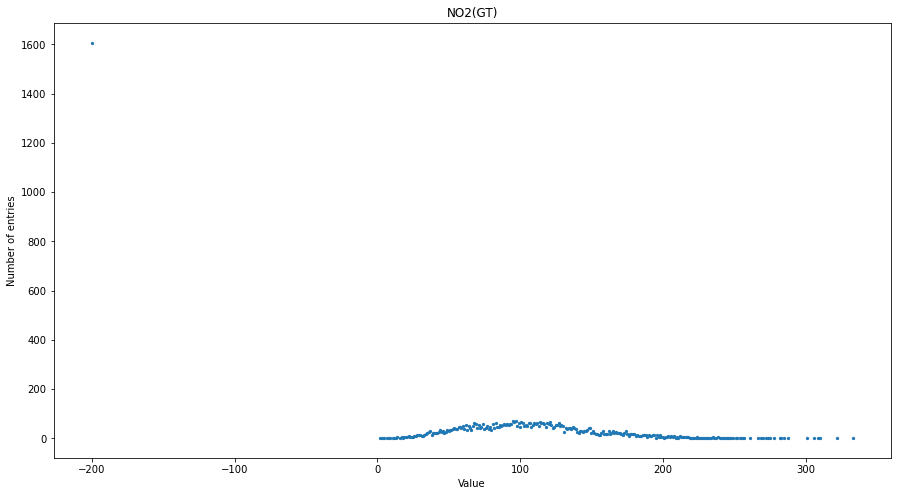

In [42]:
x_lst = df['NO2(GT)'].value_counts()

plt.title('NO2(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [43]:
df['NO2(GT)'].value_counts()

-200    1607
 97       72
 95       69
 101      67
 96       66
        ... 
 269       1
 257       1
 248       1
 229       1
 310       1
Name: NO2(GT), Length: 268, dtype: int64

In [44]:
# filter column so that values below -50 aren't included
filt = df['NO2(GT)'].between(-50, 500)
filt_df = df['NO2(GT)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

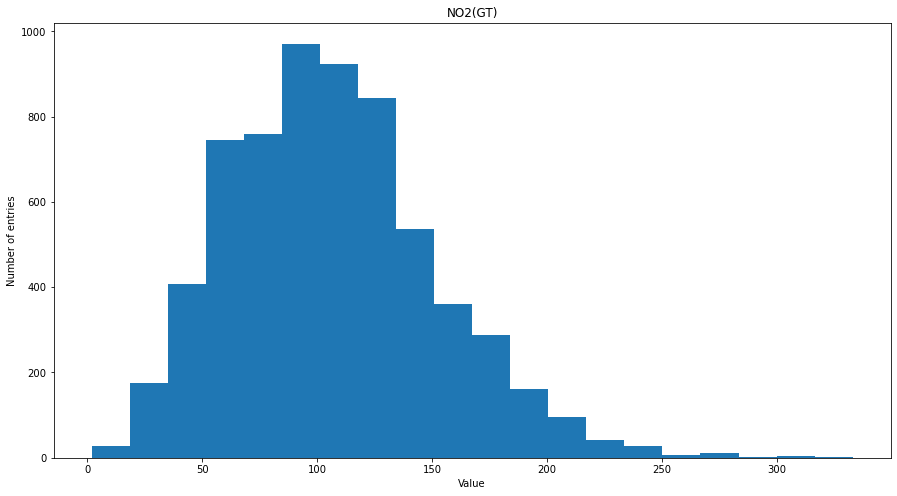

In [45]:
# histogram based on filtered column
plt.title('NO2(GT)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## PT08.S4(NO2)	

<function matplotlib.pyplot.show(close=None, block=None)>

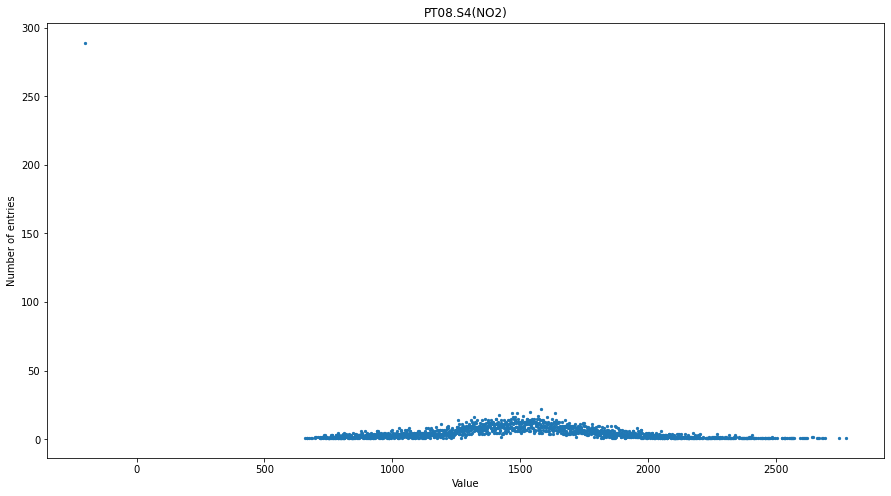

In [46]:
x_lst = df['PT08.S4(NO2)'].value_counts()

plt.title('PT08.S4(NO2)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [47]:
df['PT08.S4(NO2)'].value_counts()

-200     289
 1580     22
 1539     20
 1638     19
 1488     19
        ... 
 1908      1
 2259      1
 2365      1
 2088      1
 789       1
Name: PT08.S4(NO2), Length: 1550, dtype: int64

In [48]:
# filter column so that values below 500 aren't included
filt = df['PT08.S4(NO2)'].between(500, 3000)
filt_df = df['PT08.S4(NO2)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

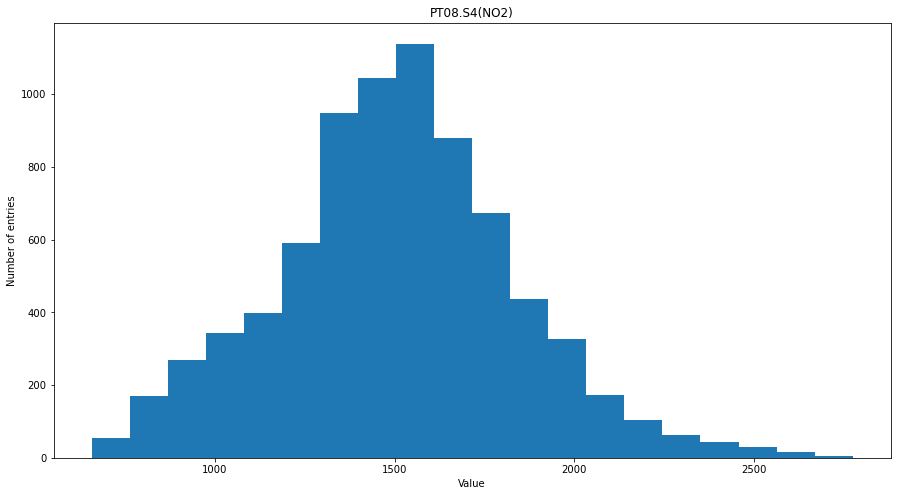

In [49]:
# histogram based on filtered column
plt.title('PT08.S4(NO2)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## PT08.S5(O3) 		

<function matplotlib.pyplot.show(close=None, block=None)>

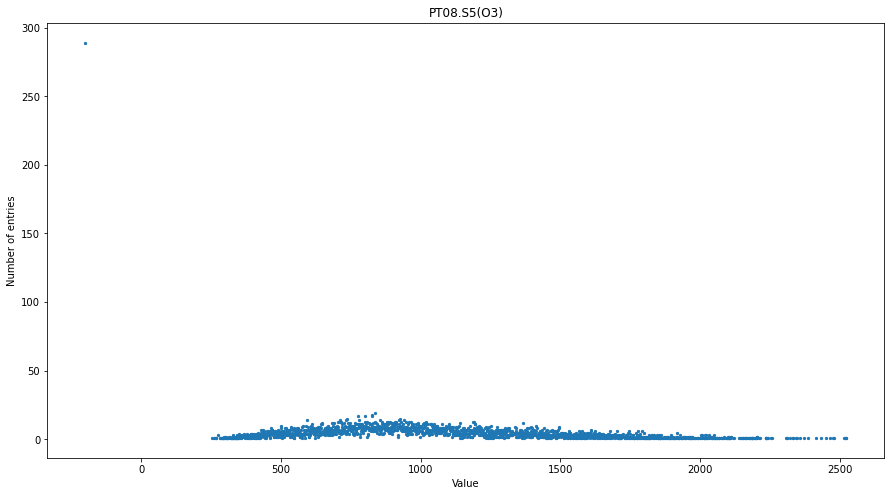

In [50]:
x_lst = df['PT08.S5(O3)'].value_counts()

plt.title('PT08.S5(O3)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [51]:
df['PT08.S5(O3)'].value_counts()

-200     289
 836      19
 825      18
 799      17
 826      17
        ... 
 1710      1
 1905      1
 1234      1
 2184      1
 1656      1
Name: PT08.S5(O3), Length: 1682, dtype: int64

In [52]:
# filter column so that values below 200 aren't included
filt = df['PT08.S5(O3)'].between(200, 3000)
filt_df = df['PT08.S5(O3)'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

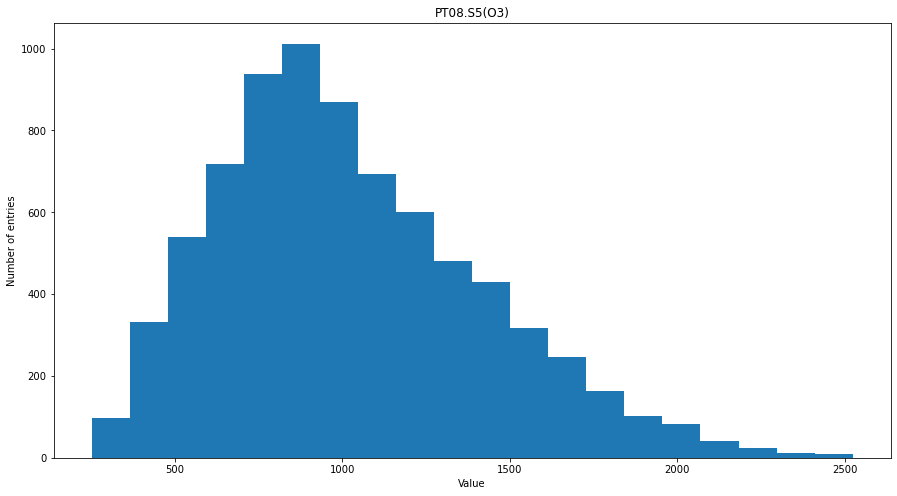

In [53]:
# histogram based on filtered column
plt.title('PT08.S5(O3)')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## T	

<function matplotlib.pyplot.show(close=None, block=None)>

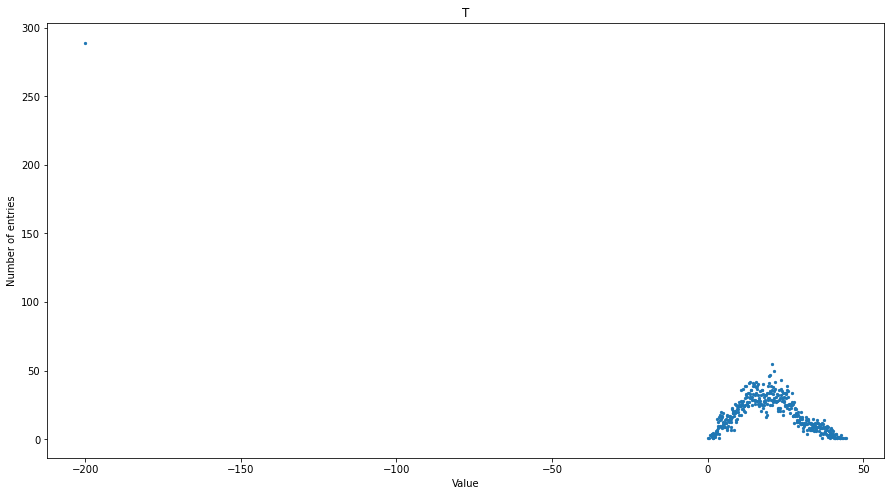

In [54]:
x_lst = df['T'].value_counts()

plt.title('T')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [55]:
df['T'].value_counts()

-200.0    289
 20.8      55
 21.3      50
 20.2      47
 19.8      46
         ... 
 44.3       1
 44.6       1
 43.4       1
 43.1       1
 0.3        1
Name: T, Length: 420, dtype: int64

In [56]:
# filter column so that values below -20 aren't included
filt = df['T'].between(-20, 100)
filt_df = df['T'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

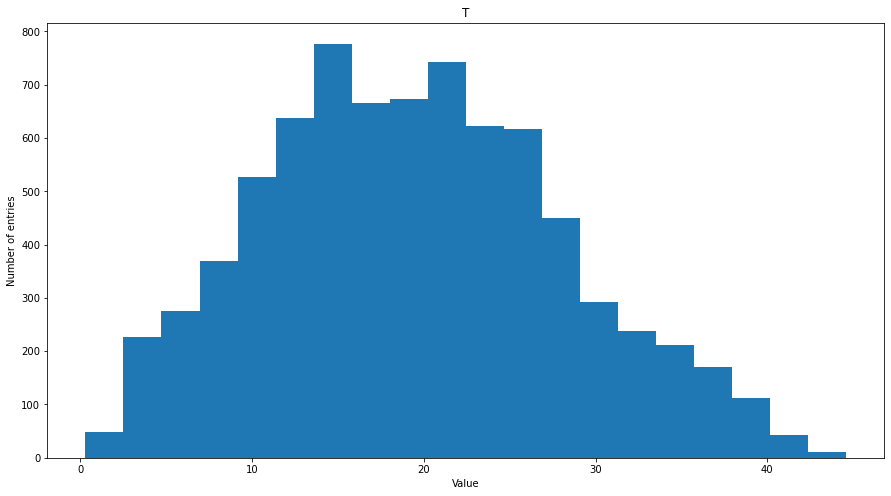

In [57]:
# histogram based on filtered column
plt.title('T')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## RH	

<function matplotlib.pyplot.show(close=None, block=None)>

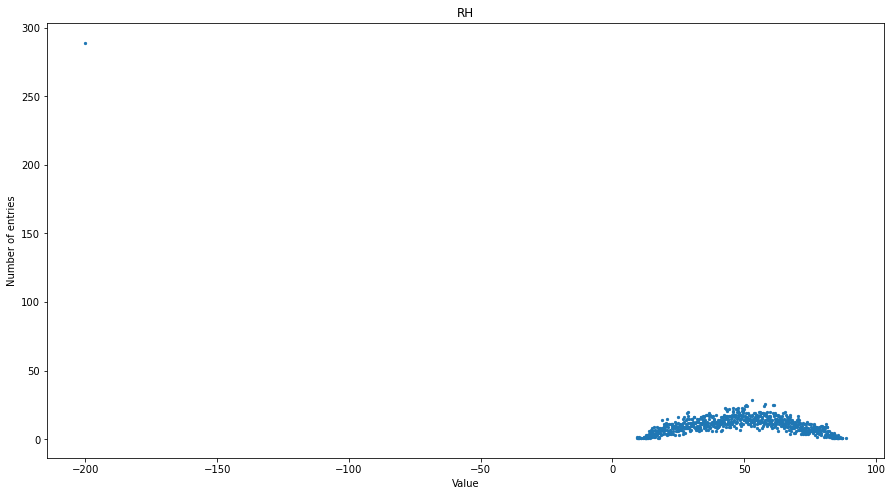

In [58]:
x_lst = df['RH'].value_counts()

plt.title('RH')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [59]:
df['RH'].value_counts()

-200.0    289
 53.1      29
 57.9      26
 50.8      25
 61.1      25
         ... 
 9.9        1
 12.9       1
 85.2       1
 85.6       1
 86.6       1
Name: RH, Length: 749, dtype: int64

In [60]:
# filter column so that values below 0 aren't included
filt = df['RH'].between(0, 100)
filt_df = df['RH'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

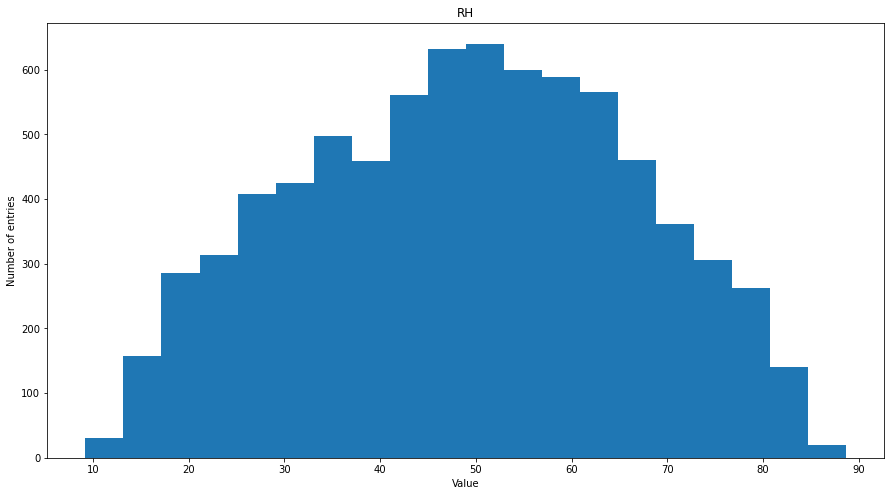

In [61]:
# histogram based on filtered column
plt.title('RH')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show

Value -200 seems to be an unwanted outlier

## AH	

<function matplotlib.pyplot.show(close=None, block=None)>

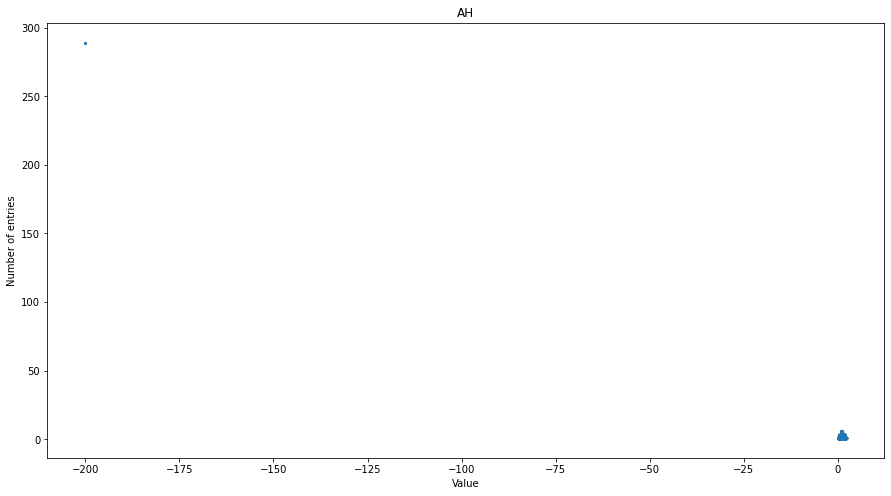

In [62]:
x_lst = df['AH'].value_counts()

plt.title('AH')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [63]:
df['AH'].value_counts()

-200.0000    289
 0.8394        6
 1.1199        6
 0.8736        5
 0.9271        5
            ... 
 1.1235        1
 1.1249        1
 1.0469        1
 1.0522        1
 0.3358        1
Name: AH, Length: 5918, dtype: int64

In [64]:
# filter column so that values below -10 aren't included
filt = df['AH'].between(-10, 100)
filt_df = df['AH'].loc[filt]

<function matplotlib.pyplot.show(close=None, block=None)>

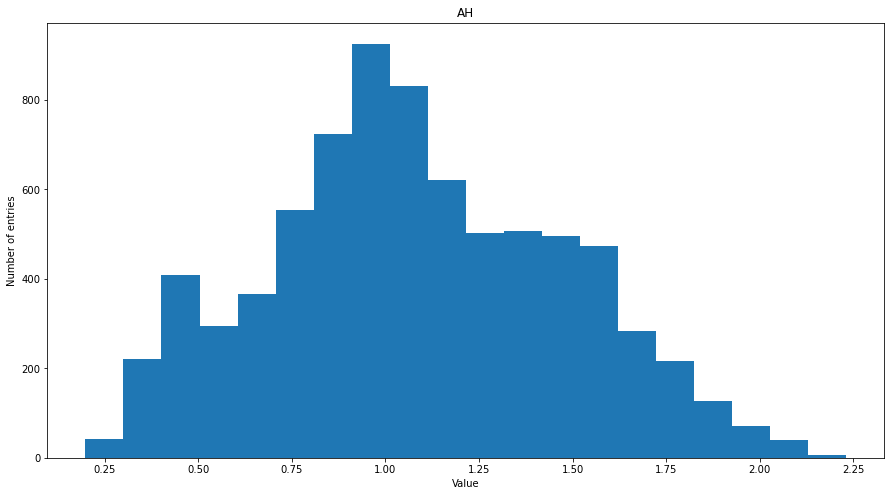

In [65]:
# histogram based on filtered column
plt.title('AH')
plt.xlabel('Value')
plt.ylabel('Number of entries')
plt.hist(filt_df, bins=20)
plt.show